<a href="https://colab.research.google.com/github/lupantaleon/Entregas-/blob/main/Redes_Neuronales_ConversionTemperaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importamos las Librerías**

En caso que les falte alguna pueden importarla al Colab con **!pip install nombre_del paquete_que _quiero** (notar el **!**antes del comando pip)
Recordar que todo lo que instalemos en Colab, se instala en la nube y no en nuestra computadora.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
#capa = tf.keras.layers.Dense(units = 1,input_shape =[1])

In [ ]:
#modelo = tf.keras.Sequential([capa])

In [ ]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(0.1),
               loss = 'mean_squared_error',              
    )

In [ ]:
#Empiezo a Entrenar

In [ ]:
historial = modelo.fit(celsius, fahrenheit,epochs = 1000,verbose = False)
print("Modelo Entrenado!!! ")

Modelo Entrenado!!! 


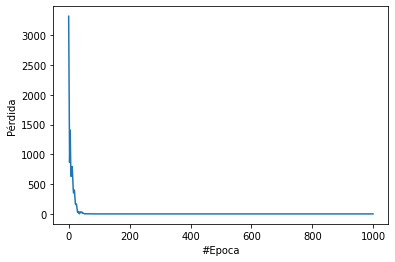

In [ ]:
plt.xlabel("#Epoca")
plt.ylabel("Pérdida")
plt.plot(historial.history["loss"])

Vemos que **el error disminuye a medida que aumento las vueltas** (épocas = Epoch), pero llego a un número de vueltas a partir del cual no mejoro mas.

**Predicciones**

Hacemos una **predicción** con un conjunto de temperaturas que no estén en el training set ( variable "celsius" en línea de código #2), llamando al **método** "**predict**"


In [ ]:
temp_celsius =[3, -5, 28, 23, 40]

In [ ]:
resultados = modelo.predict(temp_celsius)

1/1 [==============================] - 0s 120ms/step


In [ ]:
resultado_conversion = list(zip(temp_celsius,resultados))
print("***Resultado de la Conversión***")
for grados_celsius,grados_far in resultado_conversion:
  print(f'* {grados_celsius}C = {grados_far}F')

***Resultado de la Conversión***
* 3C = [37.34637]F
* -5C = [22.96278]F
* 28C = [82.295105]F
* 23C = [73.30534]F
* 40C = [103.8705]F


**Parámetros Internos de la Red: Pesos y Sesgos**

Por medio de la función get_weights, podemos ver los pesos (w) y los sesgos (b) que se asignaron a las conexiones y neuronas respectivamente  en cada capa.

In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.35926342, -0.15991922, -0.22664525]], dtype=float32), array([ 3.0835793, -3.0123537, -3.0141616], dtype=float32)]
[array([[-0.8986017 ,  1.231197  ,  1.1326742 ],
       [ 0.287301  , -0.8997964 , -0.2678699 ],
       [ 0.69764876,  0.19653817, -0.9189102 ]], dtype=float32), array([-2.9903884,  3.2025132,  2.9916515], dtype=float32)]
[array([[-0.91396236],
       [ 0.96453273],
       [ 1.2065072 ]], dtype=float32), array([3.0415916], dtype=float32)]


In [ ]:
# Comparemos con los coeficientes de la Formula: F = 1.8 *C + 32 ... dio así de bien porque este ejemplo es justo una función lineal

In [ ]:
# que pasa si hago lo mismocon mas neuronas y  capas?? pruebo 2 capas con 3 neuronas cada una
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [ ]:
# aprendio mas rápido. Desde la epoca 50 ya no tiene nada nuevo
# Los coeficientes inernos de la red ya no se correponden con los de la ecuación, es la mejor combinacion de pesos y sesgs con los que llegó a la 
#rta que le parecio mas acertada.